In [34]:
#Mount Google Drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [35]:
#Importing required libraries for the NLP 2 Capstone Project

import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import chi2_contingency
import datetime
from scipy.stats import chi2
import nltk # Import NLTK
nltk.download('stopwords') # Downloading stopwords
nltk.download('punkt') # Downloading tokenizer
from nltk.corpus import stopwords # Import stop words
from string import punctuation
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data_path = r'/content/drive/My Drive/Colab Notebooks/GL Capstone Project/'
file_name = 'IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv'
output_file_name = 'capproj1.csv'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
#Import data

accident_df_raw = pd.read_csv(data_path + file_name)
accident_df_raw.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [37]:
#Data analysis and EDA as below

accident_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [38]:
accident_df_raw = accident_df_raw.drop(columns='Unnamed: 0', axis=1)

In [39]:
accident_df_raw['Date'] = pd.to_datetime(accident_df_raw['Data'])
accident_df_raw = accident_df_raw.drop(columns='Data', axis=1)
accident_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Countries                 425 non-null    object        
 1   Local                     425 non-null    object        
 2   Industry Sector           425 non-null    object        
 3   Accident Level            425 non-null    object        
 4   Potential Accident Level  425 non-null    object        
 5   Genre                     425 non-null    object        
 6   Employee or Third Party   425 non-null    object        
 7   Critical Risk             425 non-null    object        
 8   Description               425 non-null    object        
 9   Date                      425 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [40]:
accident_df_raw['Month'] =  accident_df_raw['Date'].apply(lambda d: d.month)
accident_df_raw['Year'] =  accident_df_raw['Date'].apply(lambda d: d.year)
accident_df_raw_data = accident_df_raw.copy()
print("Dataset has 425 rows and 12 columns ->", accident_df_raw.shape)

print("Null entry count of dataset as below")
accident_df_raw.isnull().sum()

Dataset has 425 rows and 12 columns -> (425, 12)
Null entry count of dataset as below


Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
Date                        0
Month                       0
Year                        0
dtype: int64

In [41]:
#Makes count plot and prints value counts

def make_count_plot(data, x, hue=" "):
    if(len(hue) <= 1):
        sns.countplot(x=x,data=data)
    else:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
        sns.countplot(x=x,data=data, ax=axes[0])
        sns.countplot(x=x,data=data,hue=hue, ax=axes[1])
    plt.show()
    
    print(data[x].value_counts())

<Figure size 1080x720 with 0 Axes>

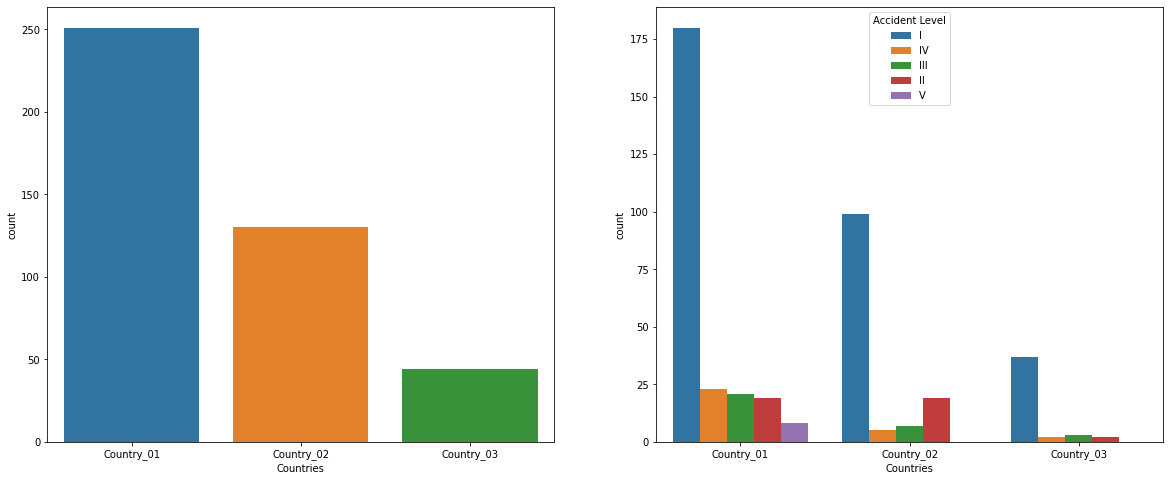

Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64


In [42]:
#Count plot of Accident level by country

plt.figure(figsize=(15, 10))
make_count_plot(accident_df_raw, 'Countries', hue='Accident Level')

#From below Country_01 has the highest level of accidents and level 1 accidents too

<Figure size 1080x720 with 0 Axes>

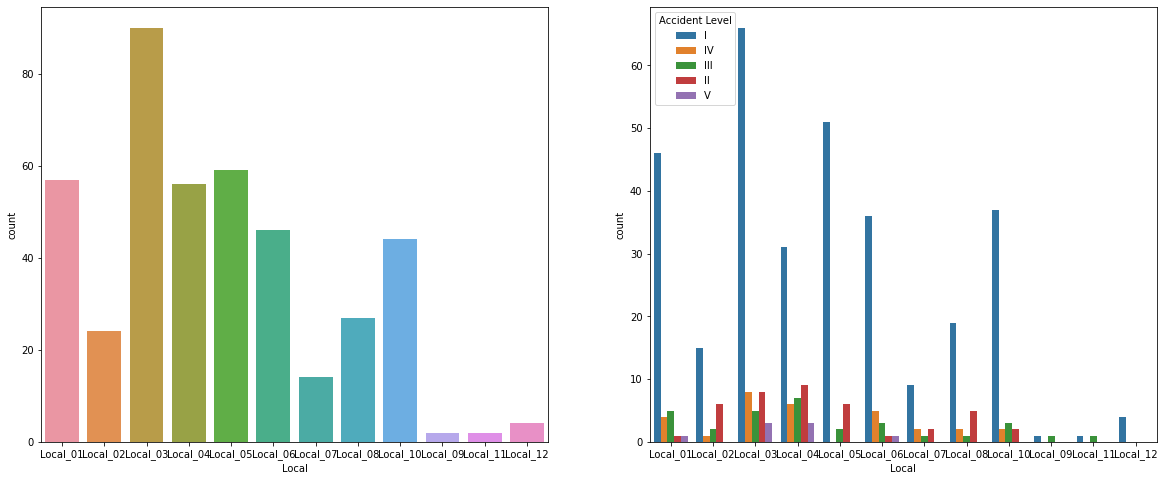

Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64


In [43]:
#Count plot of Accident level by location

plt.figure(figsize=(15, 10))
make_count_plot(accident_df_raw, 'Local', hue='Accident Level')

#From below Local_03 has the highest level of accidents and level 1 accidents too

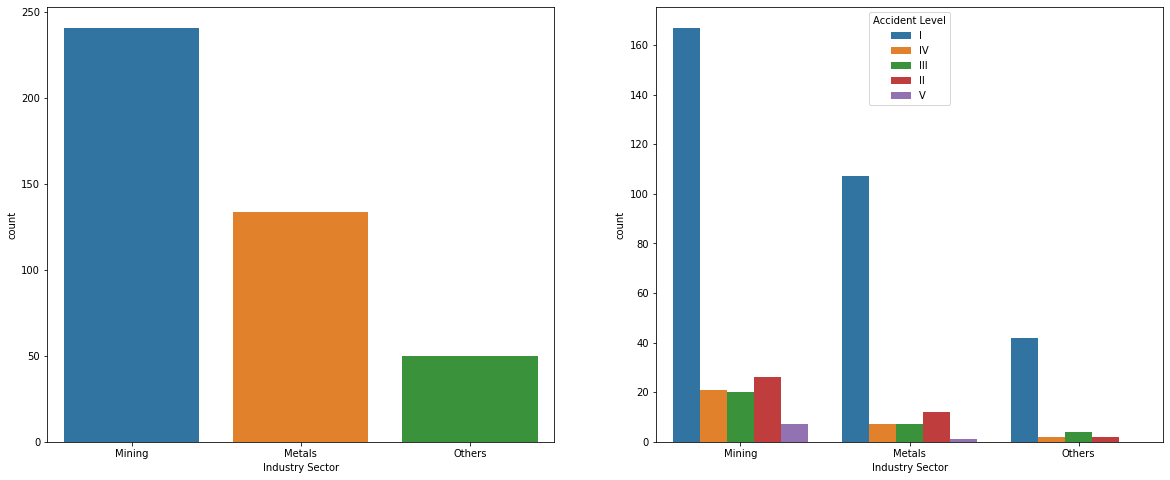

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64


In [44]:
#Count plot of Accident level by Industry Sector

make_count_plot(accident_df_raw, 'Industry Sector', hue='Accident Level')

#From below Mining has the highest level of accidents and level 1 accidents too

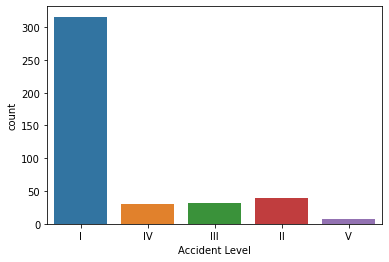

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64


In [45]:
#Count plot of Accident Level 

make_count_plot(accident_df_raw, 'Accident Level')

#From below level 1 accidents are most frequent

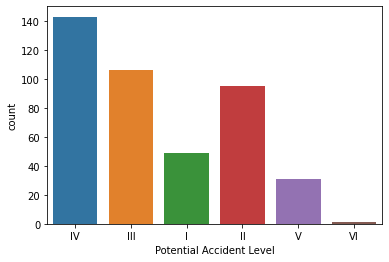

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64


In [46]:
#Count plot of Potential Accident Level

make_count_plot(accident_df_raw, 'Potential Accident Level')

#From below level 4 accidents are most Potential Accident Level

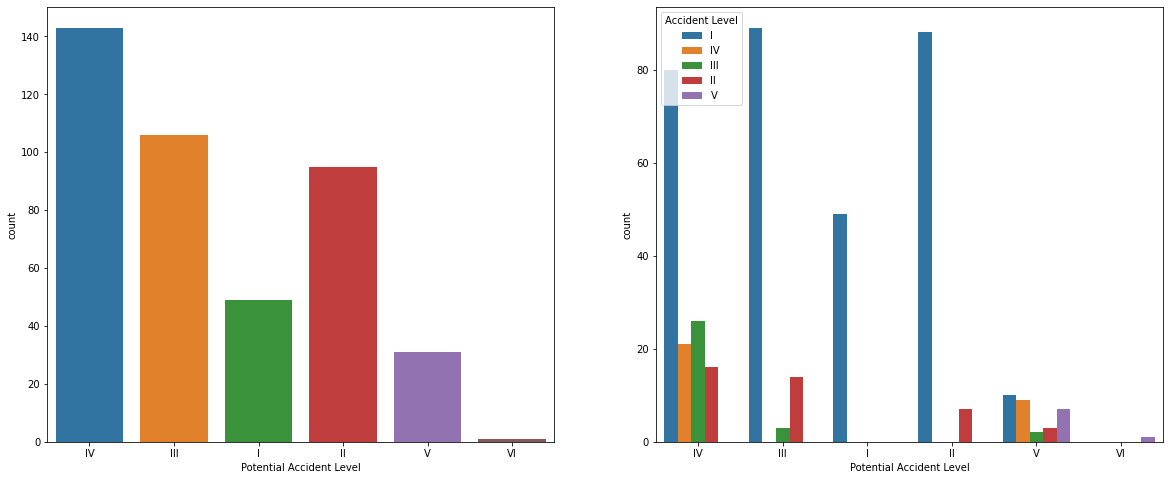

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64


In [47]:
#Count plot of Potential Accident Level wrt Accident Level

make_count_plot(accident_df_raw, 'Potential Accident Level', hue='Accident Level')

#From below level 4 accidents are most Potential Accident Level but level 1 accidents are high in occurrence

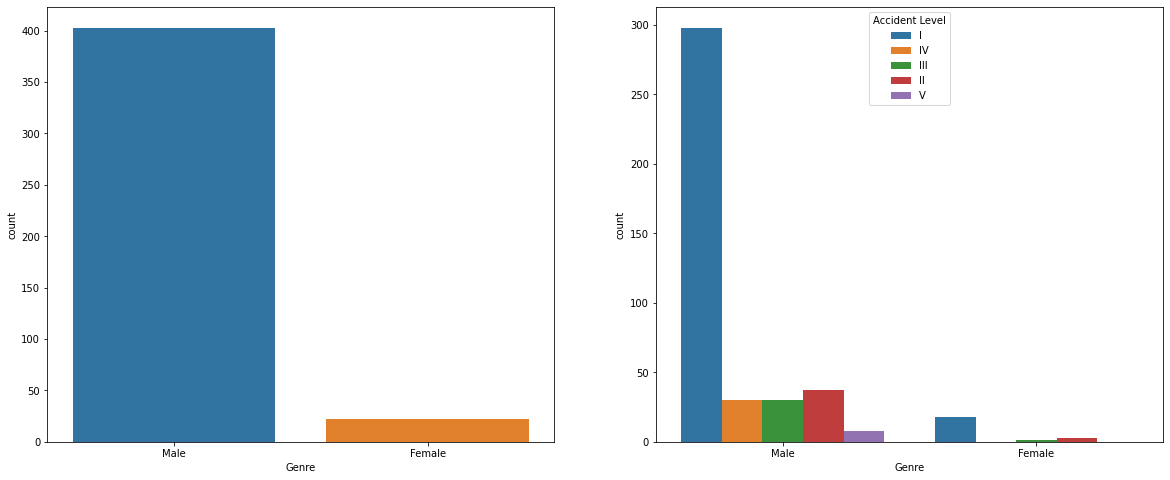

Male      403
Female     22
Name: Genre, dtype: int64


In [48]:
#Count plot of Genre wrt Accident Level

make_count_plot(accident_df_raw, 'Genre', hue='Accident Level')

#From below Male Genre has the most accidents

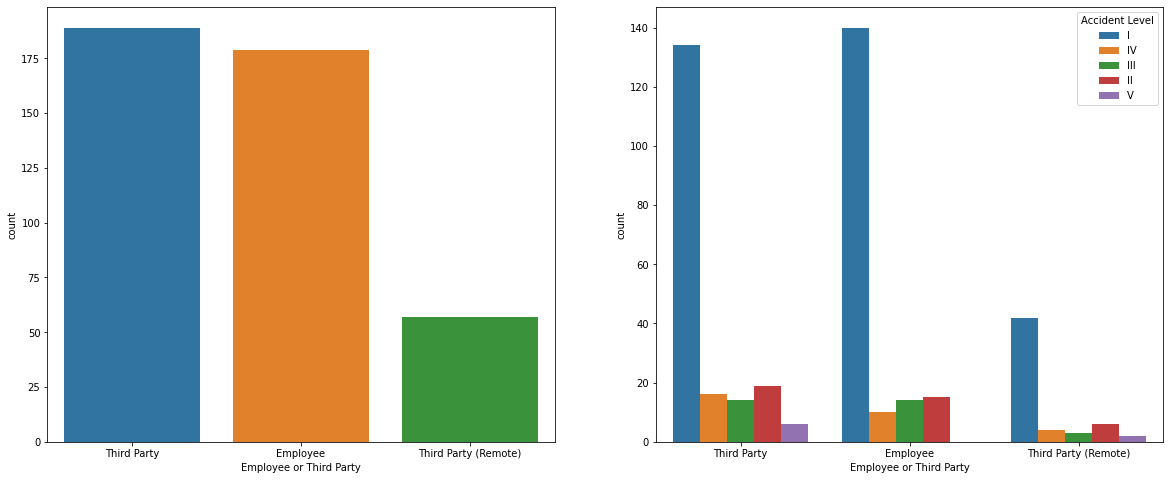

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64


In [49]:
#Count plot of Employee or Third Party wrt Accident Level

gender = { "Male": 0, "Female": 1 }
make_count_plot(accident_df_raw, 'Employee or Third Party', hue='Accident Level')

#From below Third Party and Employee both have almost same accident occurrences with high occurrence in leve1 1 accidents

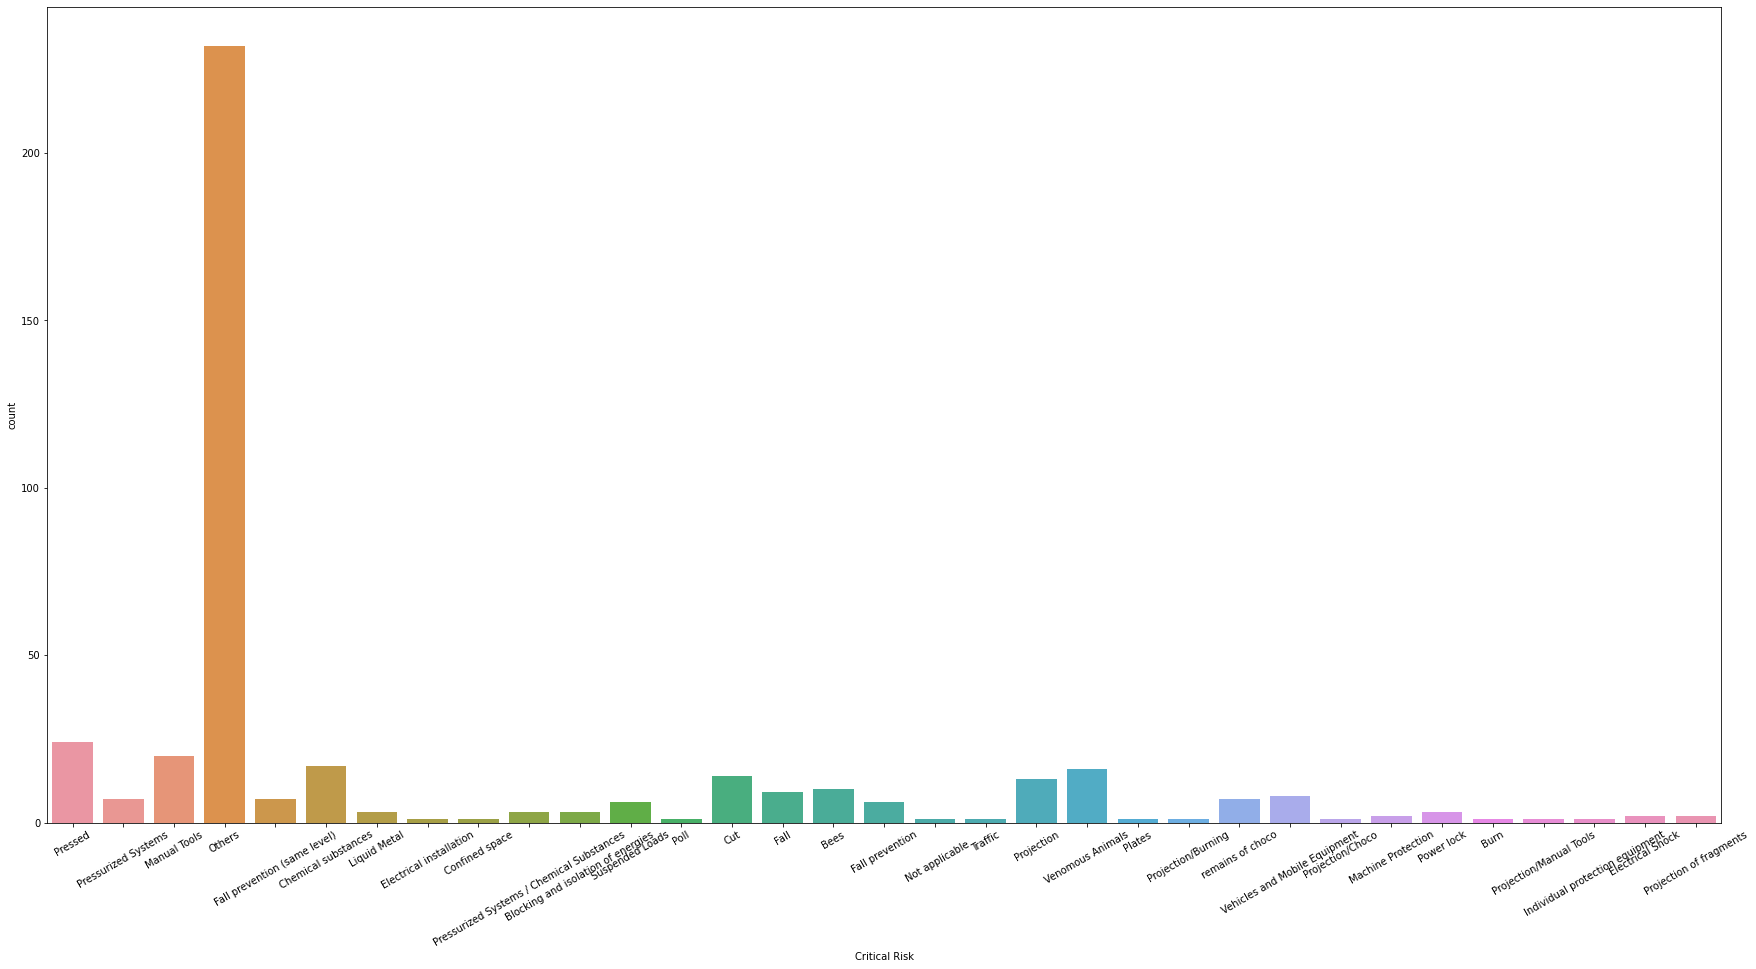

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

In [50]:
#Count plot of Critical Risk

plt.figure(figsize=(30, 15))
plt.xticks(rotation=30)
make_count_plot(accident_df_raw, 'Critical Risk')

#From below Others have the most Critical Risk

<Figure size 1080x720 with 0 Axes>

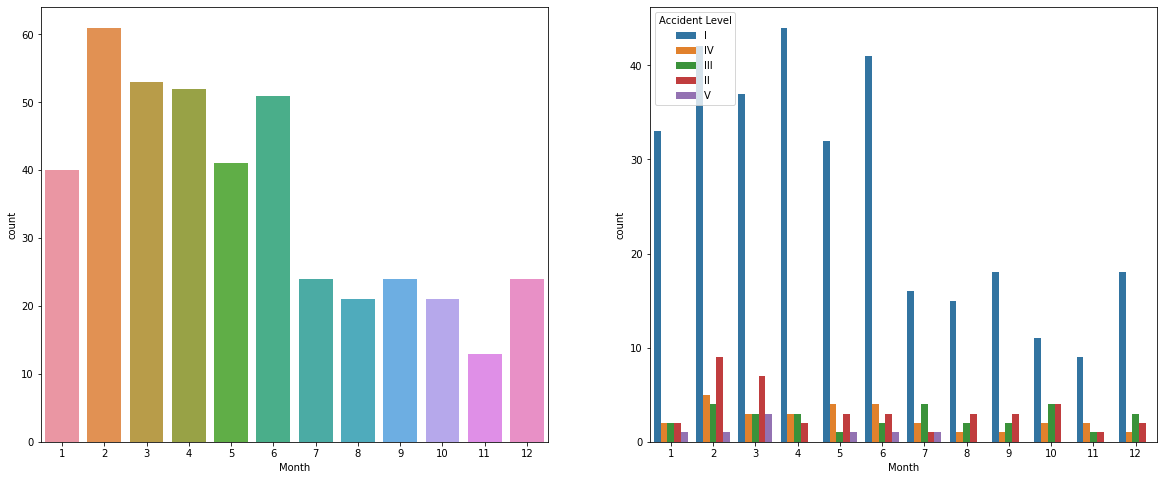

2     61
3     53
4     52
6     51
5     41
1     40
7     24
9     24
12    24
8     21
10    21
11    13
Name: Month, dtype: int64


In [51]:
#Count plot of Accident Level by Month

plt.figure(figsize=(15, 10))
make_count_plot(accident_df_raw, 'Month', hue='Accident Level')

#From below Accidents mostly occur during the first 6 months of the year

<Figure size 1080x720 with 0 Axes>

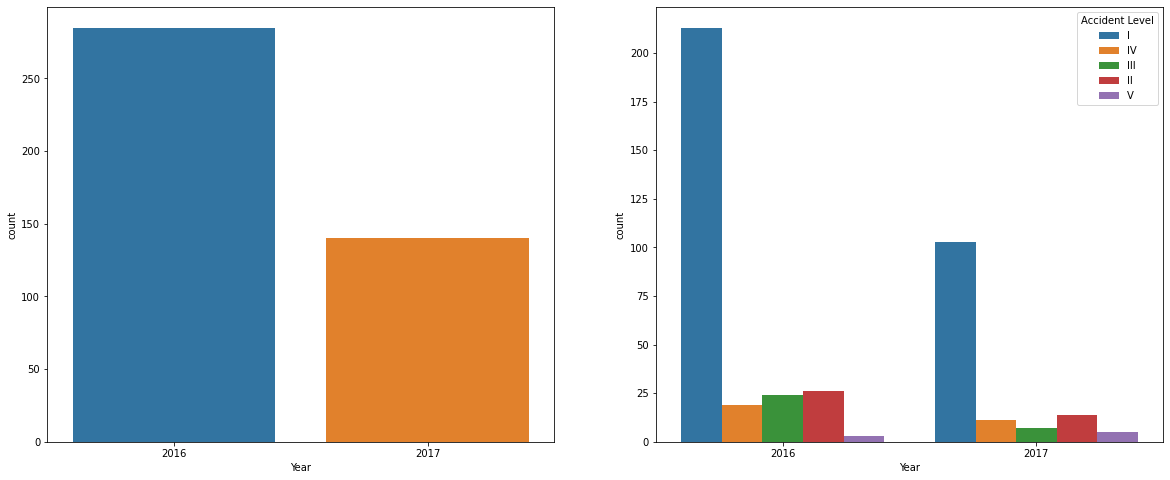

2016    285
2017    140
Name: Year, dtype: int64


In [52]:
#Count plot of Accident Level by Year

plt.figure(figsize=(15, 10))
make_count_plot(accident_df_raw, 'Year', hue='Accident Level')

#2016 has had more accidents as compared to 2017

In [53]:
#Chi-Square test below with alpha = 0.05
#accident_df_raw_data = accident_df_raw
accident_df_raw.columns

Index(['Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description', 'Date', 'Month', 'Year'],
      dtype='object')

In [54]:
accident_level = { "I": 0, "II": 1, "III": 2, "IV": 3, "V": 4, "VI": 5 }
accident_df_raw["Potential Accident Level"] = accident_df_raw["Potential Accident Level"].map(accident_level)
accident_df_raw["Accident Level"] = accident_df_raw["Accident Level"].map(accident_level)

gender = { "Male": 0, "Female": 1 }
accident_df_raw['Genre'] = accident_df_raw['Genre'].map(gender)

In [55]:
countries_encoder = LabelEncoder()
accident_df_raw['Countries'] = countries_encoder.fit_transform(accident_df_raw['Countries'])

local_encoder = LabelEncoder()
accident_df_raw['Local'] = local_encoder.fit_transform(accident_df_raw['Local'])

industry_sector_encoder = LabelEncoder()
accident_df_raw['Industry Sector'] = industry_sector_encoder.fit_transform(accident_df_raw['Industry Sector'])

gender_encoder = LabelEncoder()
accident_df_raw['Genre'] = gender_encoder.fit_transform(accident_df_raw['Genre'])

tp_encoder = LabelEncoder()
accident_df_raw['Employee or Third Party'] = tp_encoder.fit_transform(accident_df_raw['Employee or Third Party'])

risk_encoder = LabelEncoder()
accident_df_raw['Critical Risk'] = risk_encoder.fit_transform(accident_df_raw['Critical Risk'])

In [56]:
accident_df_raw.head()

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Date,Month,Year
0,0,0,1,0,3,0,1,20,While removing the drill rod of the Jumbo 08 f...,2016-01-01,1,2016
1,1,1,1,0,3,0,0,21,During the activation of a sodium sulphide pum...,2016-01-02,1,2016
2,0,2,1,0,2,0,2,15,In the sub-station MILPO located at level +170...,2016-01-06,1,2016
3,0,3,1,0,0,0,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,2016-01-08,1,2016
4,0,3,1,3,3,0,1,16,Approximately at 11:45 a.m. in circumstances t...,2016-01-10,1,2016


In [57]:
# H0: Countries have no impact on Accident Level
# Ha: Countries have impact on Accident Level

countries_cross_tab = pd.crosstab(index = accident_df_raw['Countries'], columns = accident_df_raw['Accident Level'])
chi2, p, dof, ex =chi2_contingency(countries_cross_tab)
p

#Since p is less than alpha = 0.05 we reject the null hypothesis

0.029289135181414006

In [58]:
# H0: Local have no impact on Accident Level
# Ha: Local have impact on Accident Level

local_cross_tab = pd.crosstab(index = accident_df_raw['Local'], columns = accident_df_raw['Accident Level'])
chi2, p, dof, ex =chi2_contingency(local_cross_tab)
p

#Since p is greater than alpha = 0.05 we hold the null hypothesis

0.08517417019121315

In [59]:
# H0: Industry Sector have no impact on Accident Level
# Ha: Industry Sector have impact on Accident Level

sector_cross_tab = pd.crosstab(index = accident_df_raw['Industry Sector'], columns = accident_df_raw['Accident Level'])
chi2, p, dof, ex =chi2_contingency(sector_cross_tab)
p

#Since p is greater than alpha = 0.05 we hold the null hypothesis

0.22169109324538974

In [60]:
# H0: Employee or Third Party have no impact on Accident Level
# Ha: Employee or Third Party have impact on Accident Level

tp_cross_tab = pd.crosstab(index = accident_df_raw['Employee or Third Party'], columns = accident_df_raw['Accident Level'])
chi2, p, dof, ex =chi2_contingency(tp_cross_tab)
p

#Since p is greater than alpha = 0.05 we hold the null hypothesis

0.40041517232275947

In [61]:
#Data Processing

# accident_df_raw_data.shape
# accident_df_raw_data.info()
accident_df_raw_data.head()

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Date,Month,Year
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016-01-01,1,2016
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016-01-02,1,2016
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016-01-06,1,2016
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016-01-08,1,2016
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016-01-10,1,2016


In [62]:
#Lower Case words in the description column
accident_df_raw_data.iloc[0,8:9]
accident_df_raw_data["Description"] = accident_df_raw_data["Description"].str.lower()
accident_df_raw_data.iloc[0,8:9]

Description    while removing the drill rod of the jumbo 08 f...
Name: 0, dtype: object

In [63]:
#Remove stop words and punctuations from description column
stop_words = stopwords.words('english') + list(punctuation)

def removestopwords(text):
    text = re.sub("\'", "", text) 
    text = re.sub("[^a-zA-Z]"," ",text) 
    text = ' '.join(text.split()) 
    text = text.lower() 
    no_stopword_text = [w for w in text.split() if not w in stop_words and not w.isdigit()]
    return ' '.join(no_stopword_text)

accident_df_raw_data["Description"] = accident_df_raw_data["Description"].apply(lambda x: removestopwords(x))
accident_df_raw_data.iloc[0,8:9]

Description    removing drill rod jumbo maintenance superviso...
Name: 0, dtype: object

There are 100687 words in the combination of all Description.


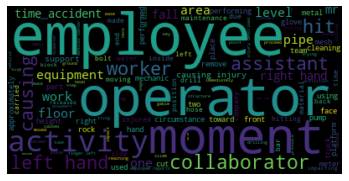

In [64]:
#Word Cloud

#text = accident_df_raw_data.Description[0]
text = " ".join(desc for desc in accident_df_raw_data.Description)
print ("There are {} words in the combination of all Description.".format(len(text)))

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [65]:
#Save data to csv to pass to model

#accident_df_raw_data = accident_df_raw_data.drop(columns='Unnamed: 0', axis=1)
accident_df_raw_data = accident_df_raw_data.drop(columns='Local', axis=1)
accident_df_raw_data = accident_df_raw_data.drop(columns='Industry Sector', axis=1)
accident_df_raw_data = accident_df_raw_data.drop(columns='Potential Accident Level', axis=1)
accident_df_raw_data = accident_df_raw_data.drop(columns='Genre', axis=1)
accident_df_raw_data = accident_df_raw_data.drop(columns='Employee or Third Party', axis=1)
accident_df_raw_data = accident_df_raw_data.drop(columns='Critical Risk', axis=1)
accident_df_raw_data = accident_df_raw_data.drop(columns='Date', axis=1)
accident_df_raw_data = accident_df_raw_data.drop(columns='Month', axis=1)
accident_df_raw_data = accident_df_raw_data.drop(columns='Year', axis=1)
accident_df_raw_data.to_csv(data_path + output_file_name)
accident_df_raw_data.head()

,Countries,Accident Level,Description
0,Country_01,I,removing drill rod jumbo maintenance superviso...
1,Country_02,I,activation sodium sulphide pump piping uncoupl...
2,Country_01,I,sub station milpo located level collaborator e...
3,Country_01,I,approximately nv cx ob personnel begins task u...
4,Country_01,IV,approximately circumstances mechanics anthony ...
